Importation et analyse des données

In [1]:
#### Importation des librairies necessaires
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as st
from scipy.stats import kstest 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Importation des fichiers
cust = pd.read_csv('customers.csv', sep=";")
prod = pd.read_csv('products.csv', sep=";")
transa = pd.read_csv('Transactions.csv', sep=";")

In [2]:
# Fichier contenant les informations sur l'id, le sex et la date de naissance des clients

In [3]:
cust.info()
cust.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
# Fichier contenant l'id, le prix et la catégorie des divers produits

In [5]:
prod.info()
prod.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [6]:
# Fichier contenant l'id produit, la date de transaction, l'id de la session et l'id du client

In [7]:
transa.info()
transa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [8]:
# Observation de l'unicité des differentes tables

In [9]:
unix = cust.nunique()
unixe = prod.nunique()
unixy = transa.nunique()
print(unix)

client_id    8621
sex             2
birth          76
dtype: int64


In [10]:
print(unixe)

id_prod    3286
price      1454
categ         3
dtype: int64


In [11]:
print(unixy)

id_prod         3265
date          687419
session_id    345505
client_id       8600
dtype: int64


Obtention de l'âge des clients

In [12]:
annee_n = dt.datetime.now().year
cust['age']= annee_n - cust['birth']
cust

,client_id,sex,birth,age
0,c_4410,f,1967,57
1,c_7839,f,1975,49
2,c_1699,f,1984,40
3,c_5961,f,1962,62
4,c_5320,m,1943,81
...,...,...,...,...
8616,c_7920,m,1956,68
8617,c_7403,f,1970,54
8618,c_5119,m,1974,50
8619,c_5643,f,1968,56


I - Analyse uni/bivarié pour l'interprétation des données

1 - Pieplot CA/categorie

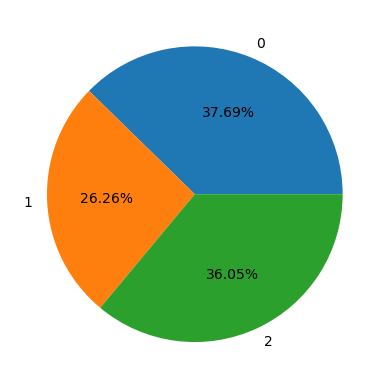

In [13]:
categ = prod.groupby('categ')['price'].sum()
categ=categ.reset_index()

categ_c = plt.pie(x=categ['price'], labels=categ['categ'], autopct='%.2f%%')

2 - Boxplot prix/categorie

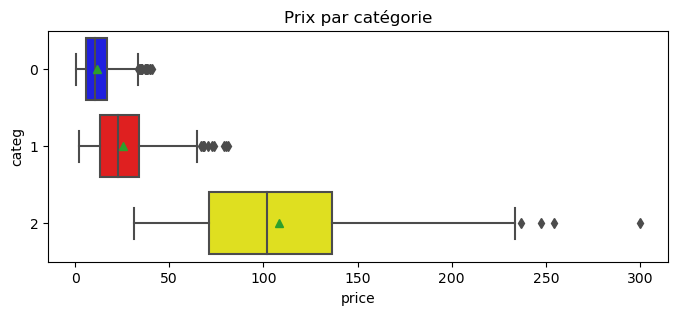

In [14]:
plt.figure(figsize=(8,3))
sns.boxplot(data=prod, y='categ', x='price', orient='h', showfliers=True, showmeans=True, palette=['blue', 'red', 'yellow'])
plt.title('Prix par catégorie')
plt.show()

3 - Pieplot sex

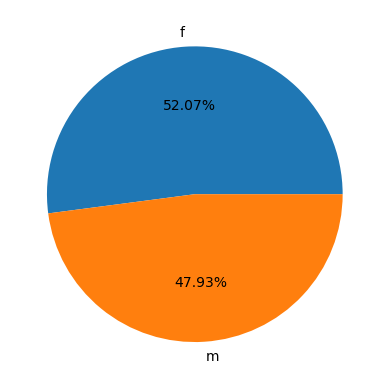

In [15]:
sex = cust.groupby('sex')['birth'].sum()
sex = sex.reset_index()
sex

sex_c = plt.pie(x=sex['birth'], labels=sex['sex'], autopct='%.2f%%')

4 - Histogramme des âges

(array([1445., 1128., 1357., 1264., 1245.,  806.,  798.,  317.,  203.,
          58.]),
 array([20. , 27.5, 35. , 42.5, 50. , 57.5, 65. , 72.5, 80. , 87.5, 95. ]),
 <BarContainer object of 10 artists>)

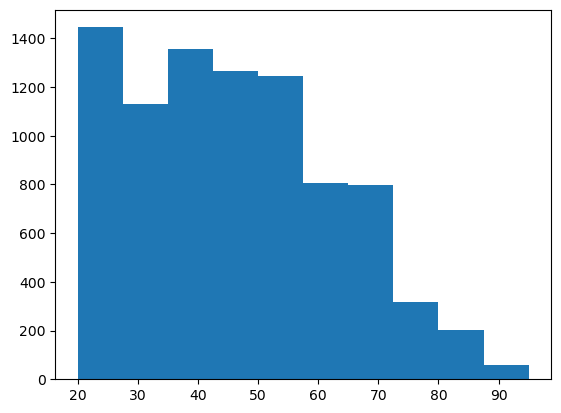

In [16]:
plt.hist(cust['age'])

II - Analyse des séries temporelles

1 - Jointures

In [17]:
data = transa.merge(cust, how='left', on='client_id').merge(prod, how='left', on='id_prod')
data

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,57,11.99,0
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,64,19.37,0
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,36,4.50,0
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,35,6.55,0
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,68,16.49,0
...,...,...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,28,21.92,1
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,30,48.99,2
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,39,26.99,1
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,71,8.99,0


2 - Changement de format date pour l'exploitation des données

In [18]:
# Identification d'une temporalité problématique

In [19]:
cole = data.loc[198325, :]
cole

id_prod                            1_400
date          2021-10-02 24:04:58.422464
session_id                      s_107311
client_id                         c_2513
sex                                    m
birth                               1981
age                                   43
price                               16.6
categ                                  1
Name: 198325, dtype: object

In [20]:
print("La date commence  ", data['date'].min()," et finit ", data['date'].max())

La date commence   2021-03-01 00:01:07.843138  et finit  2023-02-28 23:58:30.792755


In [21]:
# Conversion en datetime


data[['Date', 'Time']] = data['date'].str.split(expand=True)

# Utilisation du timedelta
data.Date = pd.to_datetime(data.Date)
data.Time = pd.to_timedelta(data.Time)

# Correction du temps
data['datetime'] = data.Date + data.Time
data = data.drop(['Date', 'Time'], axis=1)

print(data)
print(data.dtypes)

       id_prod                        date session_id client_id sex  birth  \
0       0_1259  2021-03-01 00:01:07.843138        s_1     c_329   f   1967   
1       0_1390  2021-03-01 00:02:26.047414        s_2     c_664   m   1960   
2       0_1352  2021-03-01 00:02:38.311413        s_3     c_580   m   1988   
3       0_1458  2021-03-01 00:04:54.559692        s_4    c_7912   f   1989   
4       0_1358  2021-03-01 00:05:18.801198        s_5    c_2033   f   1956   
...        ...                         ...        ...       ...  ..    ...   
687529   1_508  2023-02-28 23:49:03.148402   s_348444    c_3573   f   1996   
687530    2_37  2023-02-28 23:51:29.318531   s_348445      c_50   f   1994   
687531   1_695  2023-02-28 23:53:18.929676   s_348446     c_488   f   1985   
687532  0_1547  2023-02-28 23:58:00.107815   s_348447    c_4848   m   1953   
687533  0_1398  2023-02-28 23:58:30.792755   s_348435    c_3575   f   1981   

        age  price  categ                   datetime  
0       

In [22]:
# Deux format de date dont un exploitable

In [23]:
fole = data.loc[198325, :]
fole

id_prod                            1_400
date          2021-10-02 24:04:58.422464
session_id                      s_107311
client_id                         c_2513
sex                                    m
birth                               1981
age                                   43
price                               16.6
categ                                  1
datetime      2021-10-03 00:04:58.422464
Name: 198325, dtype: object

3 - Ajout de année-mois et jour

In [24]:
data['année_mois'] = data['datetime'].dt.strftime('%Y-%m')

In [25]:
data['jour'] = data['datetime'].dt.strftime('%d')

In [26]:
data

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,datetime,année_mois,jour
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,57,11.99,0,2021-03-01 00:01:07.843138,2021-03,01
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,64,19.37,0,2021-03-01 00:02:26.047414,2021-03,01
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,36,4.50,0,2021-03-01 00:02:38.311413,2021-03,01
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,35,6.55,0,2021-03-01 00:04:54.559692,2021-03,01
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,68,16.49,0,2021-03-01 00:05:18.801198,2021-03,01
...,...,...,...,...,...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,28,21.92,1,2023-02-28 23:49:03.148402,2023-02,28
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,30,48.99,2,2023-02-28 23:51:29.318531,2023-02,28
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,39,26.99,1,2023-02-28 23:53:18.929676,2023-02,28
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,71,8.99,0,2023-02-28 23:58:00.107815,2023-02,28


In [27]:
print(data.nunique())

id_prod         3265
date          687419
session_id    345505
client_id       8600
sex                2
birth             76
age               76
price           1442
categ              3
datetime      687415
année_mois        24
jour              31
dtype: int64


5 - Courbes sur l'évolution du chiffre d'affaires

In [28]:
ca_global = data.groupby('année_mois').agg({'price':sum}).reset_index()

Text(0.5, 1.0, 'Chiffres des ventes par année-mois')

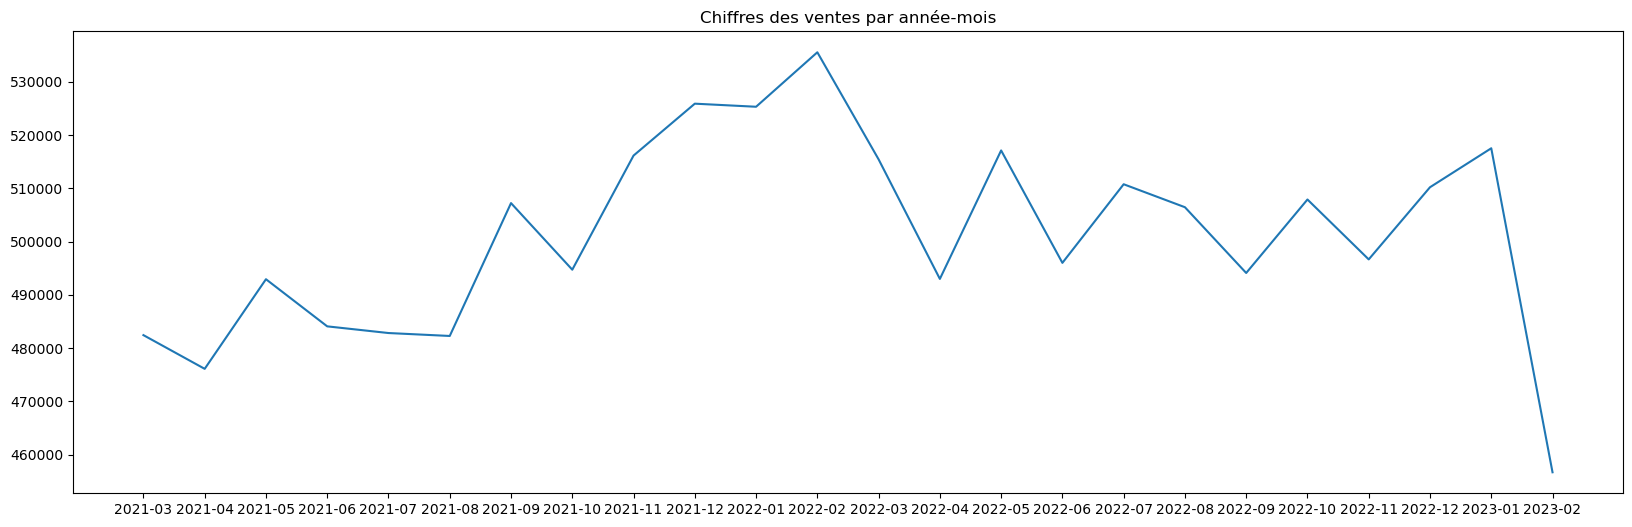

In [29]:
plt.figure(figsize=(20,6))
plt.plot(ca_global['année_mois'], ca_global["price"])
plt.title('Chiffres des ventes par année-mois')

In [30]:
print(data['price'].sum())

12027663.100000003


In [31]:
ca_global_c = data.groupby(['année_mois','categ']).agg({'price':sum}).reset_index()

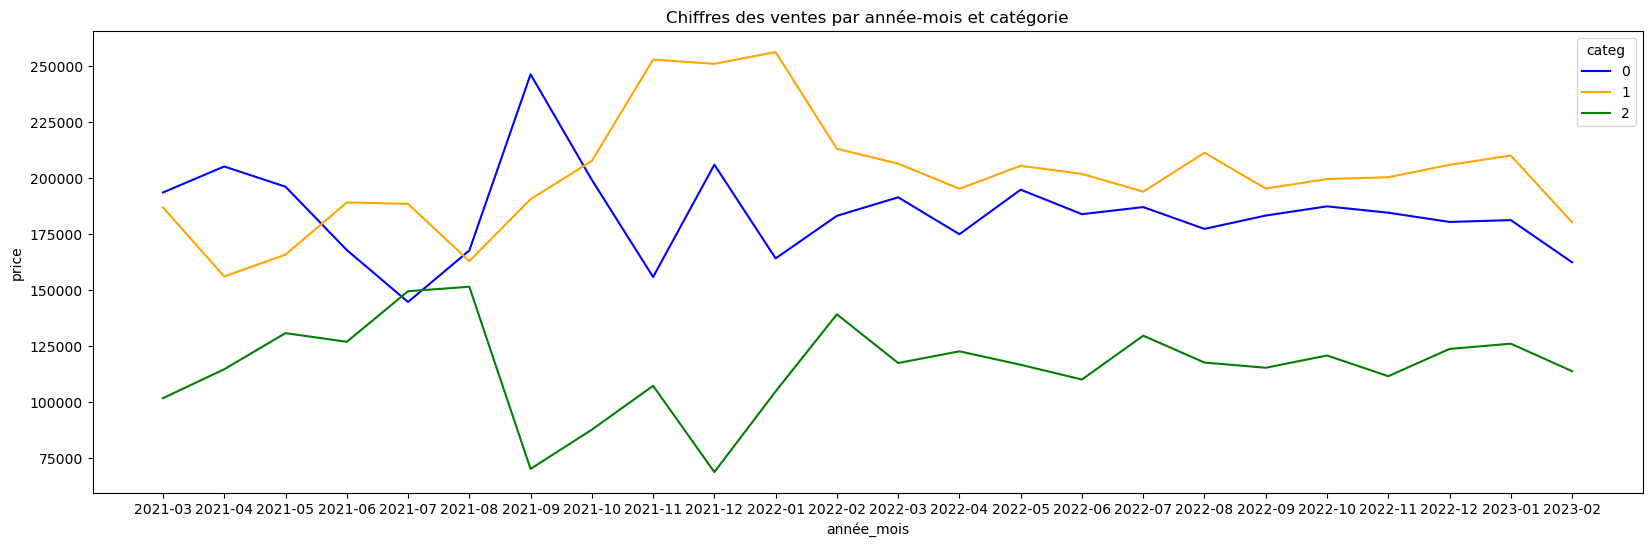

In [32]:
plt.figure(figsize=(20,6))
sns.lineplot(data=ca_global_c, x='année_mois', y='price', hue='categ', palette=['blue','orange','green'])
plt.title('Chiffres des ventes par année-mois et catégorie')
plt.show()

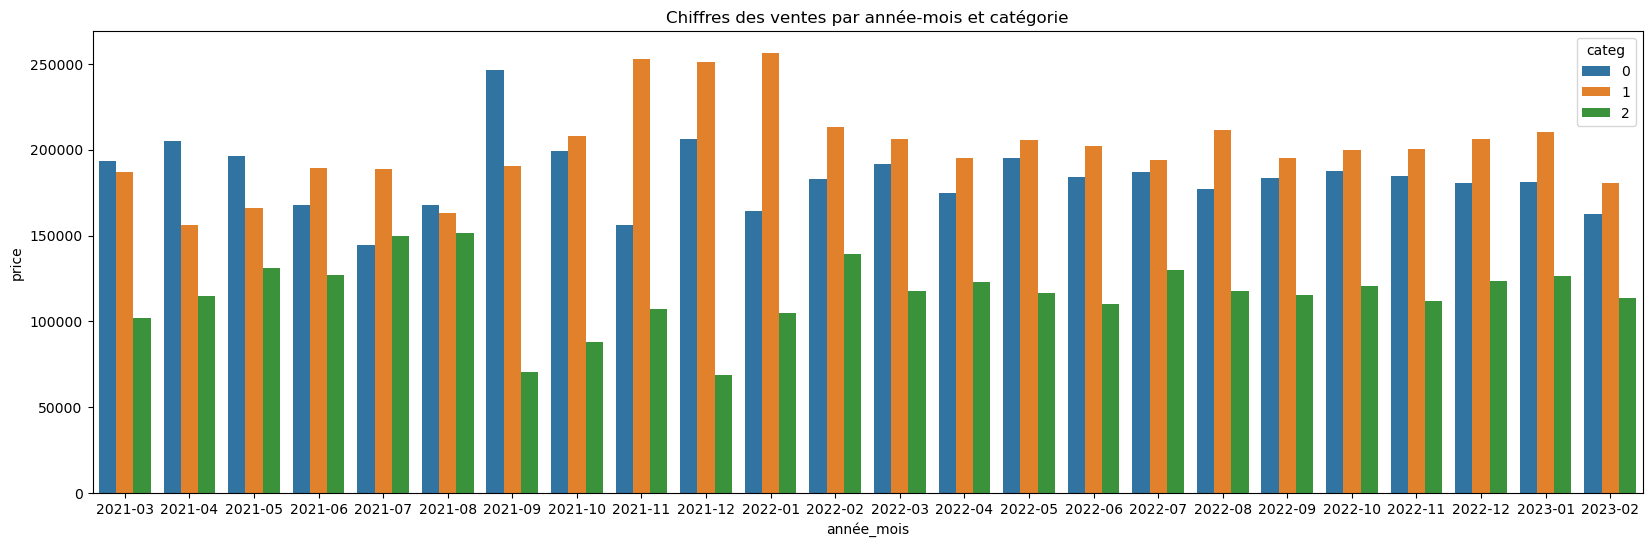

In [33]:
plt.figure(figsize=(20,6))
sns.barplot(data=ca_global_c, x='année_mois', y='price', hue='categ')
plt.title('Chiffres des ventes par année-mois et catégorie')
plt.show()

In [34]:
ca_global['Moy_mob'] = ca_global['price'].rolling(2).mean()

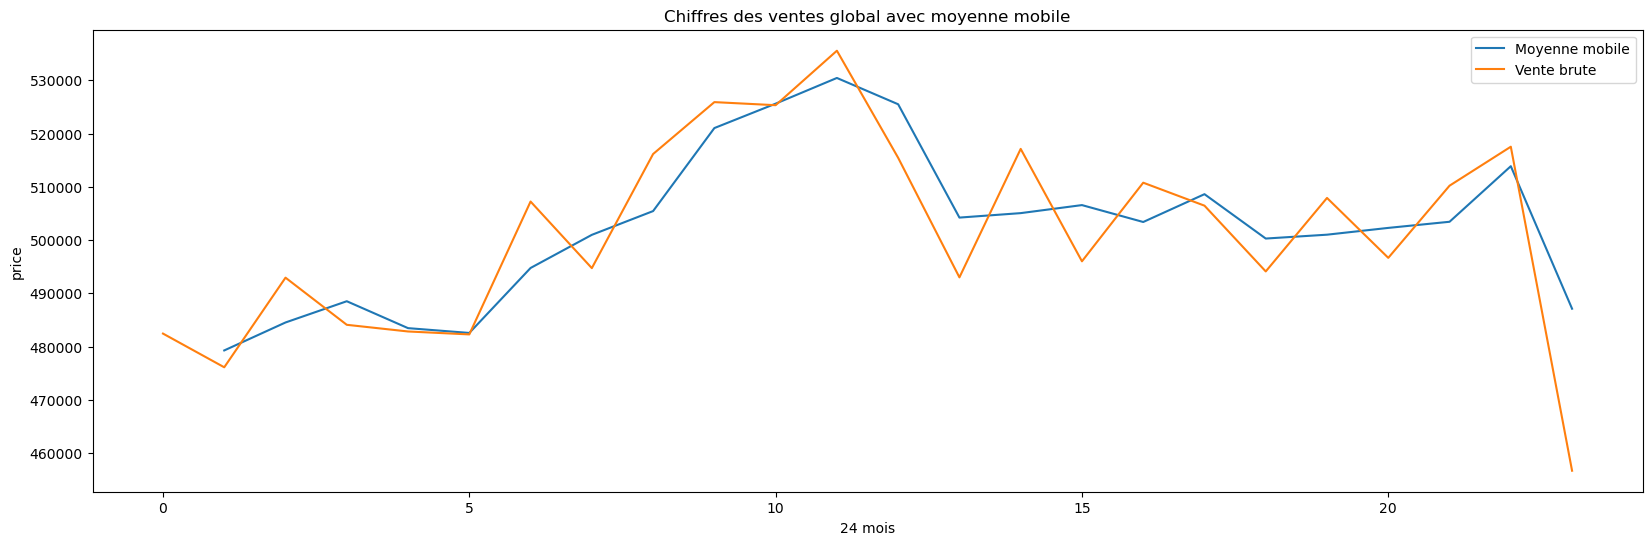

In [35]:
plt.figure(figsize=(20,6))
plt.plot(ca_global['Moy_mob'], label='Moyenne mobile')
plt.plot(ca_global['price'], label='Vente brute')
plt.legend()
plt.title('Chiffres des ventes global avec moyenne mobile')
plt.ylabel('price')
plt.xlabel('24 mois')
plt.show()

In [36]:
saison_ca = data.groupby('année_mois').agg({'price':sum}).reset_index()
saison_ca = saison_ca[saison_ca['année_mois'].str.contains('2022', regex=False)]
saison_ca['Moy_mob'] = saison_ca['price'].rolling(3).mean()

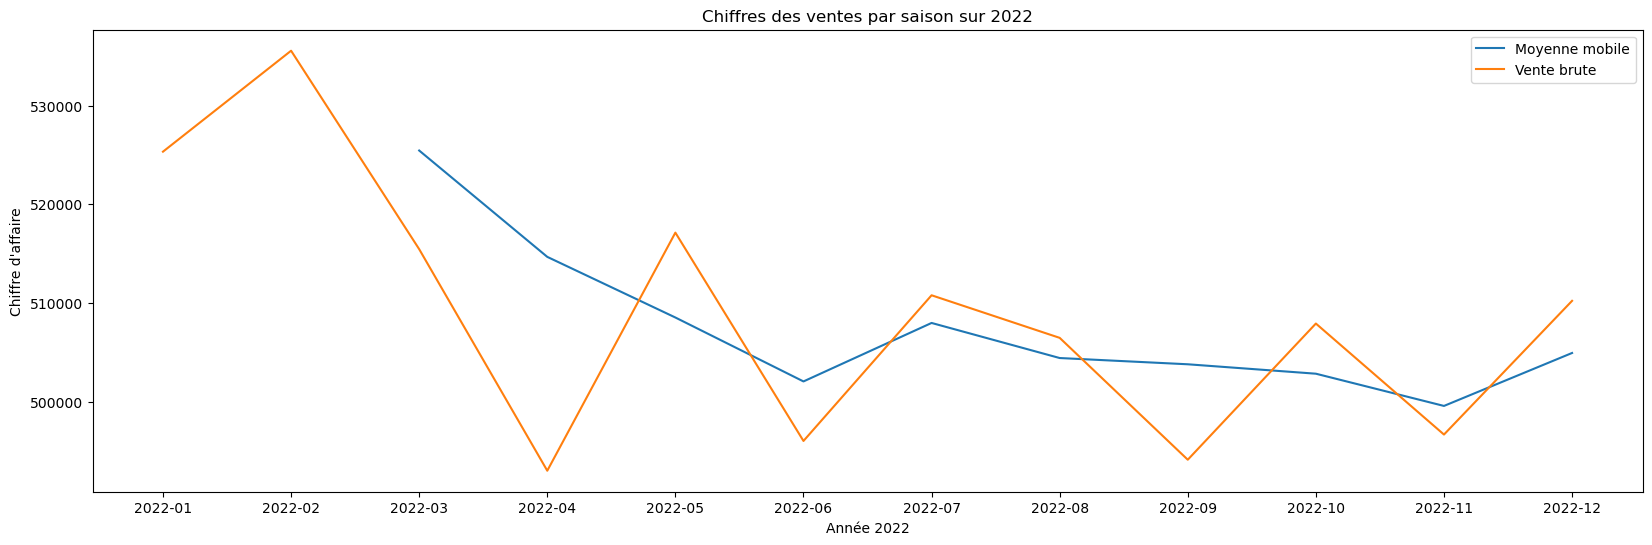

In [37]:
plt.figure(figsize=(20,6))
plt.plot(saison_ca['année_mois'],saison_ca['Moy_mob'], label='Moyenne mobile')
plt.plot(saison_ca['année_mois'],saison_ca['price'], label='Vente brute')
plt.legend()
plt.title('Chiffres des ventes par saison sur 2022')
plt.ylabel("Chiffre d'affaire")
plt.xlabel('Année 2022')
plt.show()

In [38]:
mois_ca = data[data['année_mois'].str.contains('2022-08', regex=False)]

In [39]:
mois_ca_j = mois_ca.groupby('jour').agg({'price':sum}).reset_index()

In [40]:
mois_ca_j["Moy_mob"]  = mois_ca_j['price'].rolling(2).mean()

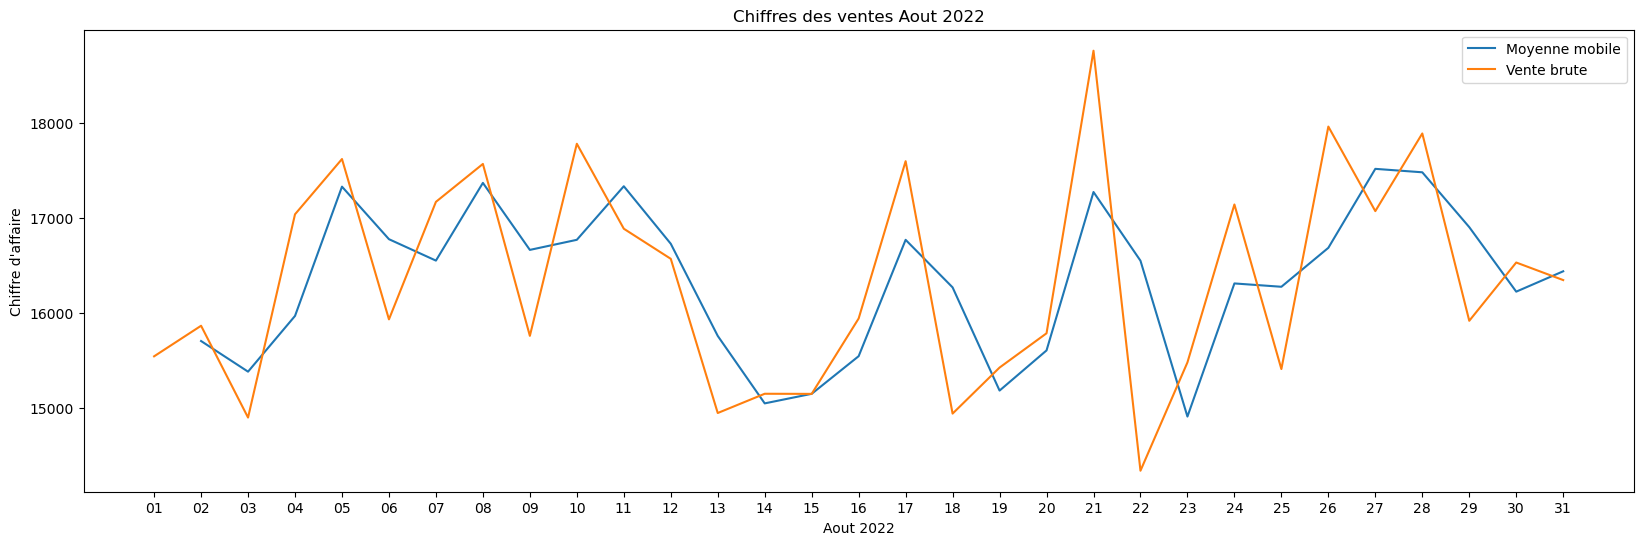

In [41]:
plt.figure(figsize=(20,6))
plt.plot(mois_ca_j['jour'],mois_ca_j['Moy_mob'], label='Moyenne mobile')
plt.plot(mois_ca_j['jour'],mois_ca_j['price'], label='Vente brute')
plt.legend()
plt.title('Chiffres des ventes Aout 2022')
plt.ylabel("Chiffre d'affaire")
plt.xlabel('Aout 2022')
plt.show()

6 - Top et Flop

In [42]:
# Toutes catégories confondus

In [43]:
prod_rank = data.groupby('id_prod').size().reset_index(name='counts')

In [44]:
top_rank_prod = prod_rank.sort_values('counts', ascending=False)
top_rank_prod = top_rank_prod.iloc[:10, :]

Text(0.5, 1.0, 'Top Global')

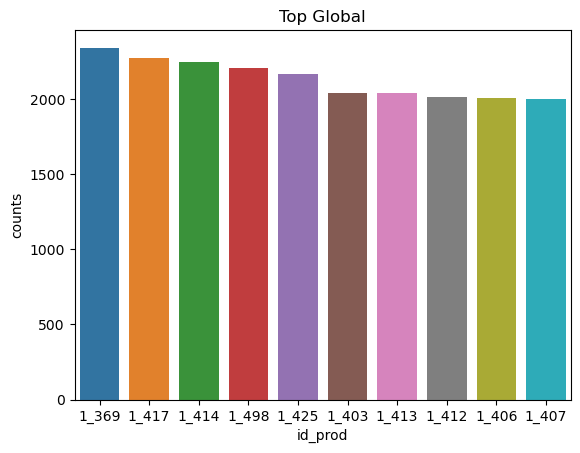

In [45]:
sns.barplot(data=top_rank_prod, x=top_rank_prod['id_prod'], y=top_rank_prod['counts'], errorbar=None)
plt.title('Top Global')

In [46]:
flop_rank_prod = prod_rank.sort_values('counts', ascending=True)
flop_rank_prod = flop_rank_prod.iloc[:10, :]

Text(0.5, 1.0, 'Flop Global')

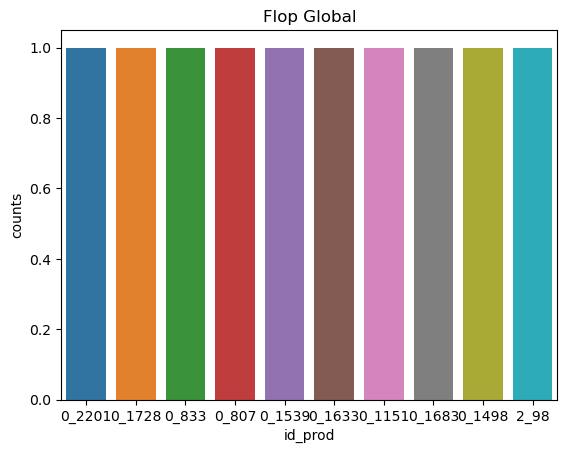

In [47]:
sns.barplot(data=flop_rank_prod, x=flop_rank_prod['id_prod'], y=flop_rank_prod['counts'], errorbar=None)
plt.title('Flop Global')

In [48]:
rank_prod_categ = data.groupby(['id_prod', 'categ']).size().reset_index(name='counts')

In [49]:
top_rank_prod_c = rank_prod_categ.sort_values('counts', ascending=False)
top_rank_prod_c = top_rank_prod_c.groupby('categ').head(10)

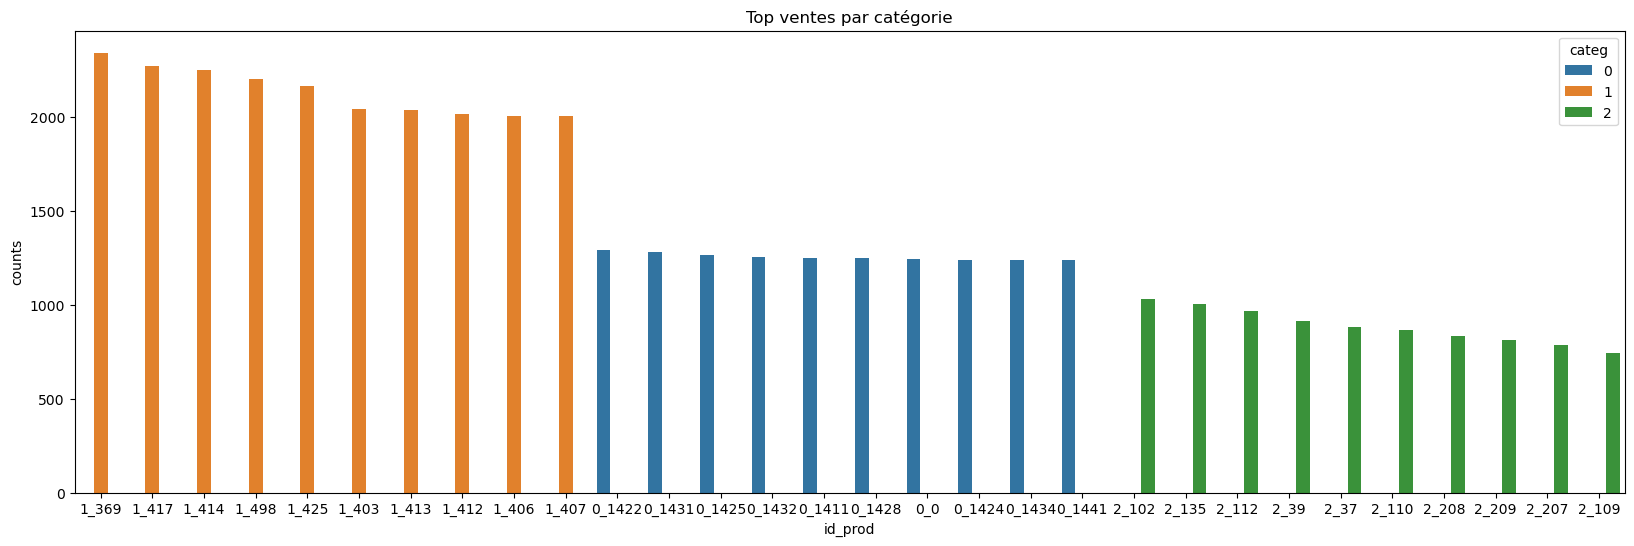

In [50]:
plt.figure(figsize=(20,6))
sns.barplot(data=top_rank_prod_c, x='id_prod', y='counts', hue='categ')
plt.title('Top ventes par catégorie')
plt.show()

In [51]:
flop_rank_prod_c = rank_prod_categ.sort_values('counts', ascending=False)
flop_rank_prod_c = flop_rank_prod_c.groupby('categ').tail(10)
flop_rank_prod_c = flop_rank_prod_c.sort_values('categ', ascending=True)

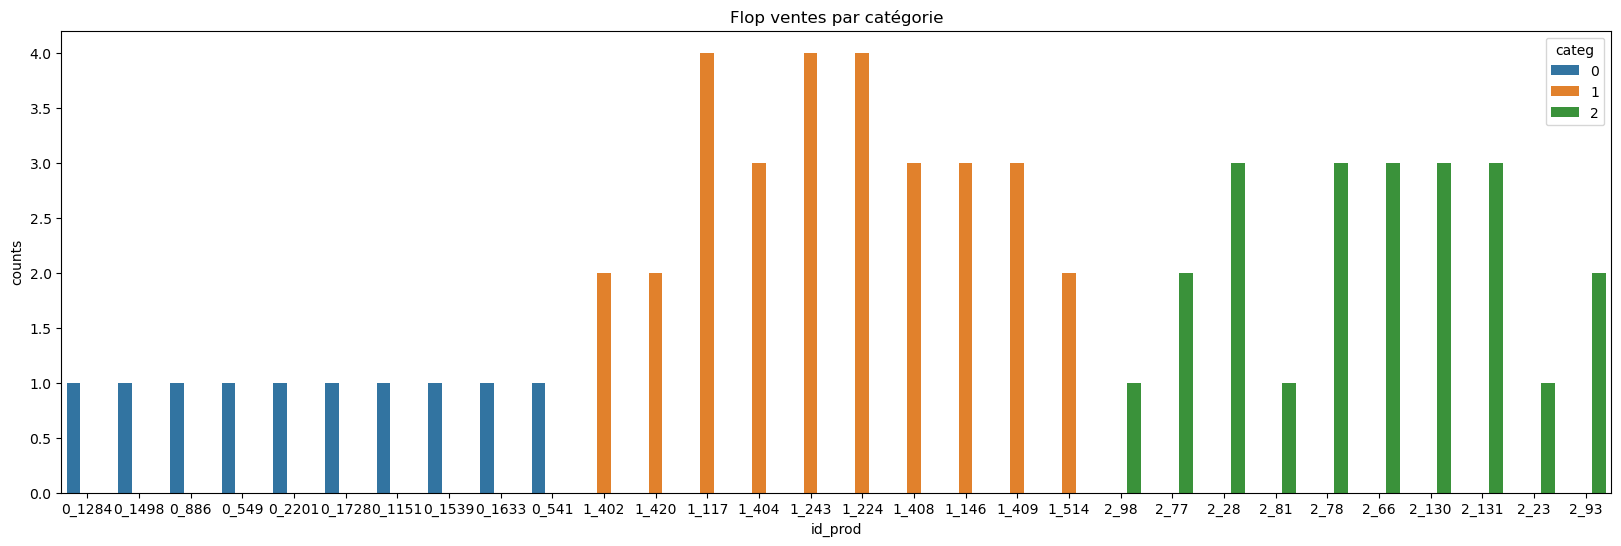

In [52]:
plt.figure(figsize=(20,6))
sns.barplot(data=flop_rank_prod_c, x='id_prod', y='counts', hue='categ')
plt.title('Flop ventes par catégorie')
plt.show()

7 - Lorenz et client pro

In [53]:
#Table contenant l'id client et le CA réaliser du plus grand au plus petit

In [54]:
fidele = data.groupby('client_id').agg({'price':sum}).reset_index()
fidele = fidele.sort_values('price', ascending=False)

In [55]:
#Lorenz avec indice de Gini

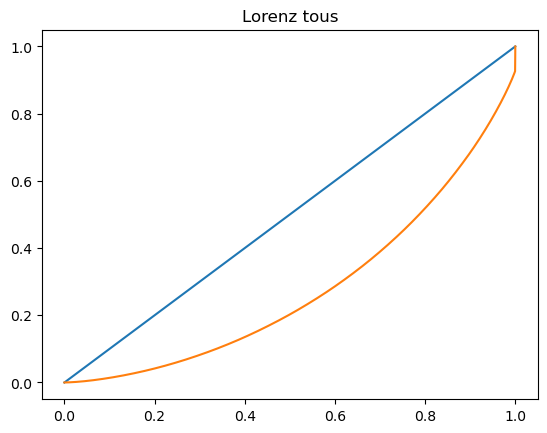

In [56]:
depenses = fidele[fidele['price'] > 0]
dep = depenses['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) 

xaxis = np.linspace(0-1/n,1+1/n,n+1) 
maxis = np.linspace(0,1,1+1)
plt.plot(maxis)
plt.title('Lorenz tous')
plt.plot(xaxis,lorenz)
plt.show()

In [57]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
gini

0.44189587995615665

In [58]:
# Répartition moyennement égalitaire mais la fin de la courbe montre une péculiarité que l'on va essayer d'expliqué

In [59]:
#Identification des clients professionels

client_pro = fidele.iloc[0:4,:]
client_pro

,client_id,price
677,c_1609,326039.89
4388,c_4958,290227.03
6337,c_6714,153918.60
2724,c_3454,114110.57


In [60]:
iso_c_pro = data.loc[data['client_id'].isin(client_pro['client_id'])]
iso_c_pro

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,datetime,année_mois,jour
6,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609,m,1980,44,5.86,0,2021-03-01 00:07:04.371179,2021-03,01
13,0_1159,2021-03-01 00:11:57.832228,s_7,c_1609,m,1980,44,7.99,0,2021-03-01 00:11:57.832228,2021-03,01
50,0_1431,2021-03-01 01:08:49.803921,s_33,c_3454,m,1969,55,10.99,0,2021-03-01 01:08:49.803921,2021-03,01
78,0_1425,2021-03-01 01:56:41.944044,s_46,c_1609,m,1980,44,12.99,0,2021-03-01 01:56:41.944044,2021-03,01
88,0_1469,2021-03-01 02:12:21.294004,s_53,c_1609,m,1980,44,14.99,0,2021-03-01 02:12:21.294004,2021-03,01
...,...,...,...,...,...,...,...,...,...,...,...,...
687482,0_1333,2023-02-28 22:40:24.405750,s_348416,c_6714,f,1968,56,5.99,0,2023-02-28 22:40:24.405750,2023-02,28
687494,1_392,2023-02-28 23:04:51.081903,s_348416,c_6714,f,1968,56,18.11,1,2023-02-28 23:04:51.081903,2023-02,28
687496,2_13,2023-02-28 23:08:40.035146,s_348403,c_4958,m,1999,25,50.99,2,2023-02-28 23:08:40.035146,2023-02,28
687498,1_183,2023-02-28 23:10:49.235323,s_348416,c_6714,f,1968,56,24.99,1,2023-02-28 23:10:49.235323,2023-02,28


In [61]:
#L'age des differents clients pro + leur id

In [62]:
print(iso_c_pro.age.unique(),iso_c_pro.client_id.unique()) 

[44 55 25 56] ['c_1609' 'c_3454' 'c_4958' 'c_6714']


In [63]:
# Identification des clients lambda

fidele_t = fidele.iloc[4:8600,:]

In [64]:
#Lorenz et Gini sans les clients pro

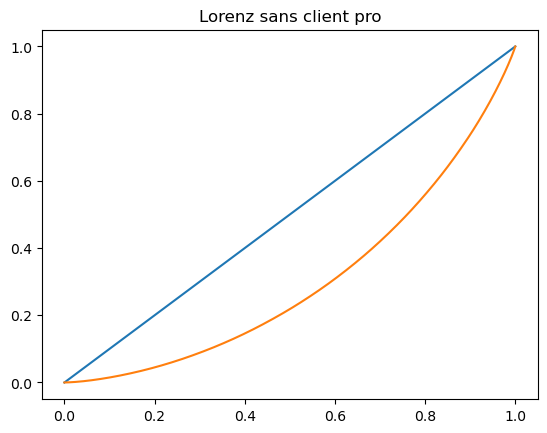

In [65]:
depenses_t = fidele_t[fidele_t['price'] > 0]
dep_t = depenses_t['price'].values
n_t = len(dep_t)
lorenz_t = np.cumsum(np.sort(dep_t)) / dep_t.sum()
lorenz_t = np.append([0],lorenz_t) 

xaxis_t = np.linspace(0-1/n_t,1+1/n_t,n_t+1) 
plt.plot(maxis)
plt.title('Lorenz sans client pro')
plt.plot(xaxis_t,lorenz_t)
plt.show()

In [66]:
AUC_t = (lorenz_t.sum() -lorenz_t[-1]/2 -lorenz_t[0]/2)/n_t 
S_t = 0.5 - AUC_t 
gini_t = 2*S_t
gini_t

0.39828603507456595

In [67]:
# On constate qu'en excluant les clients pro l'indice de Gini est encore plus égalitaire

III - Test statistique

1 - Deux variables qualitatives khi2

In [68]:
#Correlation genre/categorie avec test chi-2

genrer_categ = data.groupby(['sex', 'categ']).size().reset_index(name='counts')
genrer_categ

,sex,categ,counts
0,f,0,206103
1,f,1,119307
2,f,2,17283
3,m,0,209356
4,m,1,116285
5,m,2,19200


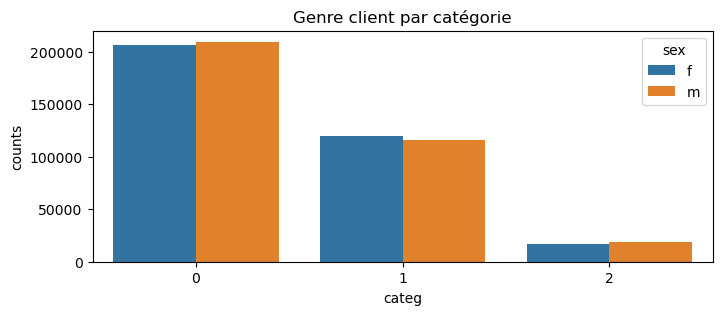

In [69]:
# Correlation genre/categorie

plt.figure(figsize=(8,3))
sns.barplot(data=genrer_categ, x='categ', y='counts', hue='sex')
plt.title('Genre client par catégorie')
plt.show()

In [70]:
# Questionnement : le sex a t'il une incidence sur les catégorie achetées ?

# H0: La répartition des achats par catégorie est la même en fonction du genre, les échantillons sont indépendants.

# H1: la répartition des achats est la différente, les échantillons sont dépendants.



In [71]:
X = "sex"
Y = "categ"
Z = "counts"

cont = genrer_categ[[X,Y,Z]].pivot_table(index=X,columns=Y,values=Z,aggfunc='sum',margins=True,margins_name='Total')
cont_t = genrer_categ[[X,Y,Z]].pivot_table(index=X,columns=Y,values=Z,aggfunc='sum')
cont

categ,0,1,2,Total
sex,,,,
f,206103,119307,17283,342693
m,209356,116285,19200,344841
Total,415459,235592,36483,687534


In [72]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont_t)
print(st_p)
print(st_exp)

4.320582228399707e-35
[[207080.50959953 117427.98066132  18184.50973915]
 [208378.49040047 118164.01933868  18298.49026085]]


In [73]:
print(st_chi2)
print(st_dof)

158.25417617304882
2


In [74]:
# H0 est retenue, les échantillons sont indépendants p < chi2

# Inférieur a 0.05 donc significatif

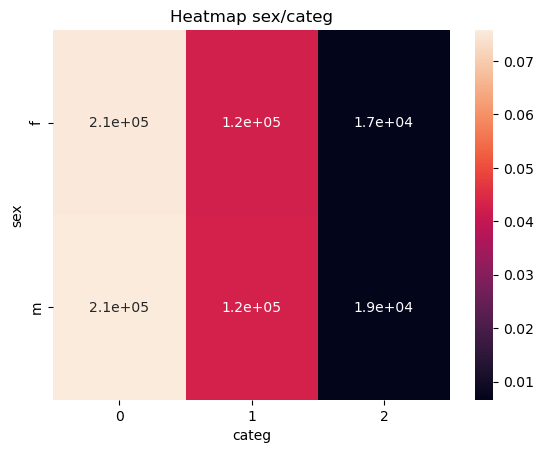

In [75]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(genrer_categ)
indep = tx.dot(ty) / n

c = cont.fillna(0) 
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Heatmap sex/categ')
plt.show()

2 - Deux variables quantitatives Pearson

In [76]:
# Test Pearson quanti quanti



In [77]:
# Création de la table complément pour les analyses quanti / quanti

In [78]:
agement_p = data.groupby('age').agg({'price':sum}).reset_index()

In [79]:
achat_p_age = data.groupby('age').size().reset_index(name='n_achats')

In [80]:
client_p_age = data.groupby('age')['client_id'].nunique().reset_index(name='n_clients')

In [81]:
compact_d = achat_p_age.merge(client_p_age, how='inner', on='age')

In [82]:
compact_d['frequence']= compact_d['n_achats']/compact_d['n_clients']/24

In [83]:
session_p_age = data.groupby('age')['session_id'].nunique().reset_index(name='n_session')

In [84]:
complement = compact_d.merge(session_p_age, how='inner', on='age')

In [85]:
complement_f = complement.merge(agement_p, how='inner', on='age')

In [86]:
complement_f['taille_p_moy'] = complement_f['n_achats']/complement_f['n_session']
complement_f['value_p_moy'] = complement_f['price']/complement_f['n_achats']

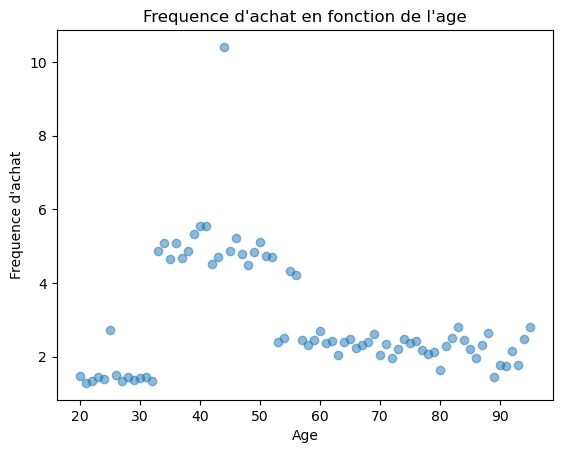

In [87]:
plt.plot(complement_f["age"],complement_f["frequence"],'o',alpha=0.5)
plt.ylabel("Frequence d'achat")
plt.xlabel("Age")
plt.title("Frequence d'achat en fonction de l'age")
plt.show()

In [88]:
# On peut émettre l'hypothèse que plus le client est jeune plus sa fréquence d'achat est grande
# Pour vérifier cette hypothèse on peut mettre en place un test de Pearson tout en s'aidant d'une droite de regression linéaire faisant face à un scatterplot de données quanti/quanti

In [89]:
Y = complement_f['frequence']
X = complement_f[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']

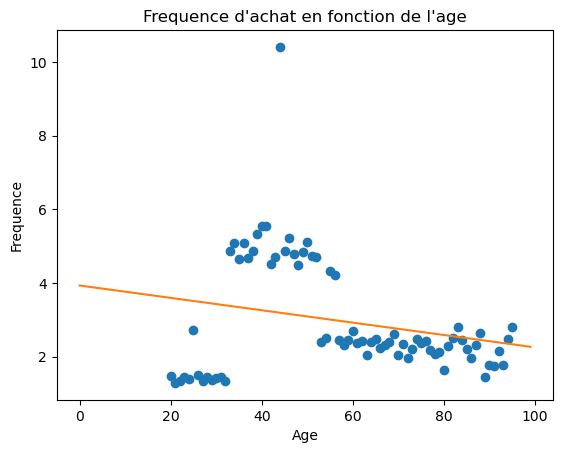

In [90]:
plt.plot(complement_f.age,complement_f.frequence, "o")
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)])
plt.xlabel("Age")
plt.ylabel("Frequence")
plt.title("Frequence d'achat en fonction de l'age")
plt.show()

In [91]:
print(st.pearsonr(complement_f["age"],complement_f["frequence"])[0])

-0.2353328389386469


In [92]:
# Faible correlation proche de 0

In [93]:
#L'age à une légère influence sur la fréquence d'achat

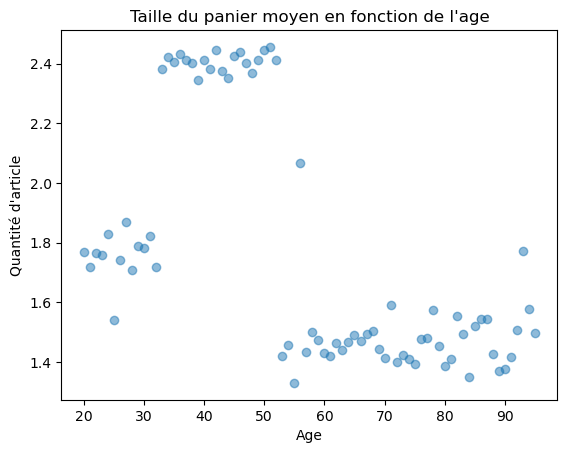

In [94]:
plt.plot(complement_f["age"],complement_f["taille_p_moy"],'o',alpha=0.5)
plt.ylabel("Quantité d'article")
plt.xlabel("Age")
plt.title("Taille du panier moyen en fonction de l'age")
plt.show()

In [95]:
# On peut émettre l'hypothèse que plus le client est jeune plus son panier moyen est conséquent
# Pour vérifier cette hypothèse on peut mettre en place un test de Pearson faisant face à un scatterplot de données quanti/quanti

In [96]:
E = complement_f['taille_p_moy']
F = complement_f[['age']]
F = F.copy() # On modifiera X, on en crée donc une copie
F['intercept'] = 1.
result = sm.OLS(E, F).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
k,l = result.params['age'],result.params['intercept']

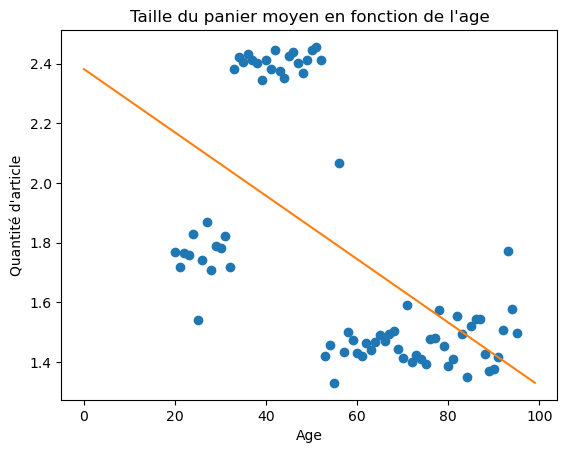

In [97]:
plt.plot(complement_f.age,complement_f.taille_p_moy, "o")
plt.plot(np.arange(100),[k*x+l for x in np.arange(100)])
plt.xlabel("Age")
plt.ylabel("Quantité d'article")
plt.title("Taille du panier moyen en fonction de l'age")
plt.show()

In [98]:
[np.var(x, ddof=1) for x in [complement_f['age'],complement_f['price'], complement_f['taille_p_moy'], complement_f['frequence']]]

[487.6666666666667, 17646096657.873074, 0.16552675415178206, 2.482630525265986]

In [99]:
print(st.pearsonr(complement_f["age"],complement_f["taille_p_moy"])[0])

-0.5764684984050898


In [100]:
# Moyenne correlation entre 0 et -1

In [101]:
#L'age à une influence modéré sur la taille du panier moyen

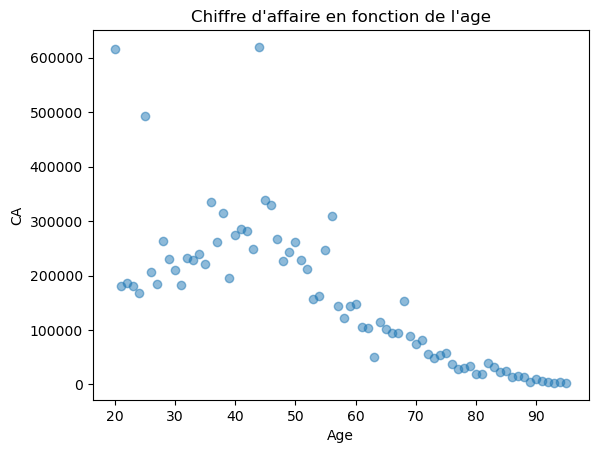

In [102]:
plt.plot(complement_f["age"],complement_f["price"],'o',alpha=0.5)
plt.ylabel("CA")
plt.xlabel("Age")
plt.title("Chiffre d'affaire en fonction de l'age")
plt.show()

In [103]:
# On peut émettre l'hypothèse que plus le client est jeune plus son chiffre d'affaire est élevé
# Pour vérifier cette hypothèse on peut mettre en place un test de Pearson faisant face à un scatterplot de données quanti/quanti

In [104]:
I = complement_f['price']
J = complement_f[['age']]
J = J.copy() # On modifiera X, on en crée donc une copie
J['intercept'] = 1.
result = sm.OLS(I, J).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
n,m = result.params['age'],result.params['intercept']

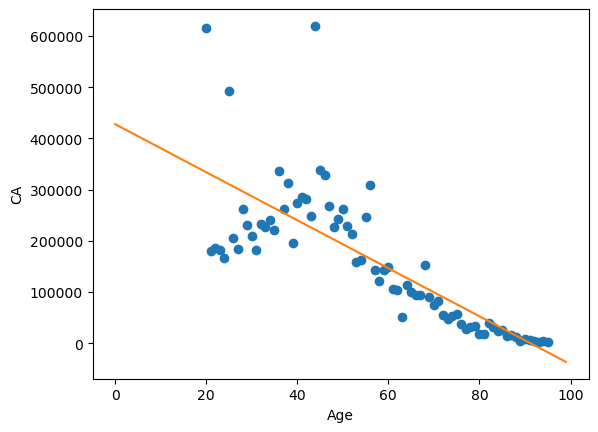

In [105]:
plt.plot(complement_f.age,complement_f.price, "o")
plt.plot(np.arange(100),[n*x+m for x in np.arange(100)])
plt.xlabel("Age")
plt.ylabel("CA")
plt.show()

In [106]:
print(st.pearsonr(complement_f["age"],complement_f["price"])[0])

-0.7796292816296744


In [107]:
# Forte correlation proche de -1

In [108]:
# L'age à une influence assez importante sur le chiffre d'affaire 

3 - Une variable qualitative et une variable quantitative Anova ?

In [109]:
# Correlation age/categorie avec test anova

age_categ = data.groupby(['age', 'categ']).size().reset_index(name='counts')
age_categ

,age,categ,counts
0,20,0,3418
1,20,1,6067
2,20,2,6012
3,21,0,909
4,21,1,1798
...,...,...,...
223,94,1,161
224,94,2,2
225,95,0,78
226,95,1,123


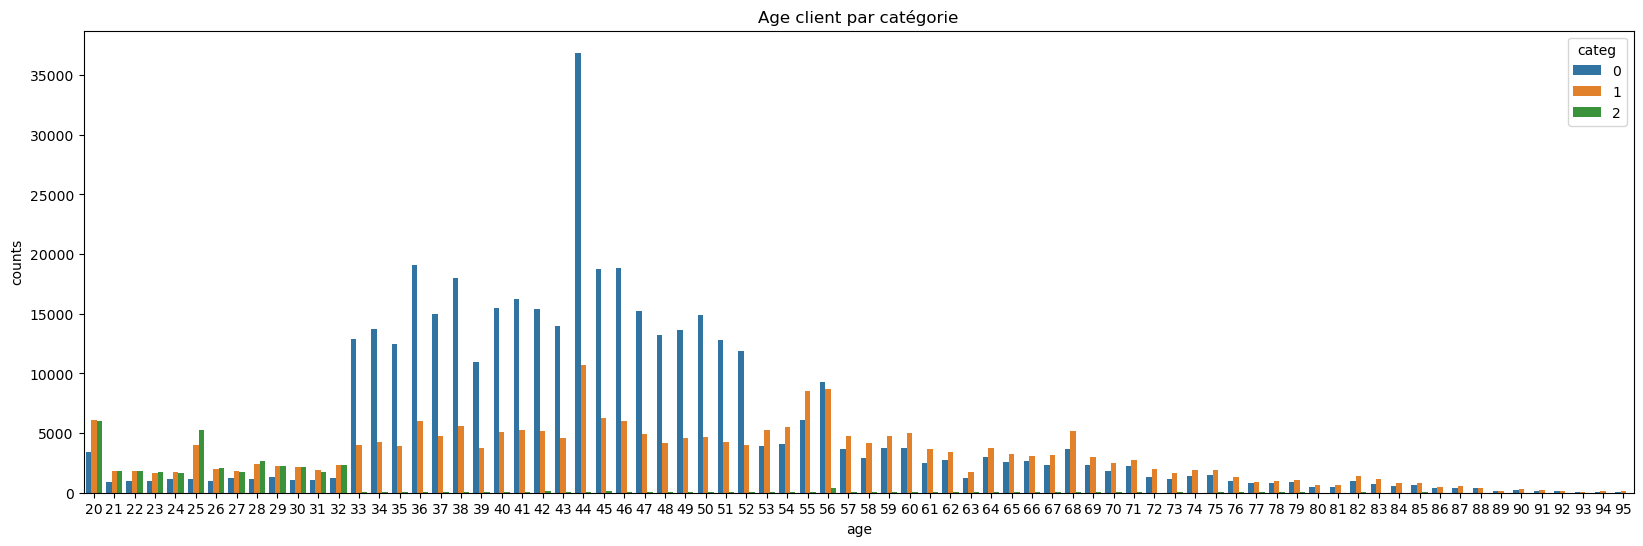

In [110]:
# Correlation age/categorie

plt.figure(figsize=(20,6))
sns.barplot(data=age_categ, x='age', y='counts', hue='categ')
plt.title('Age client par catégorie')
plt.show()

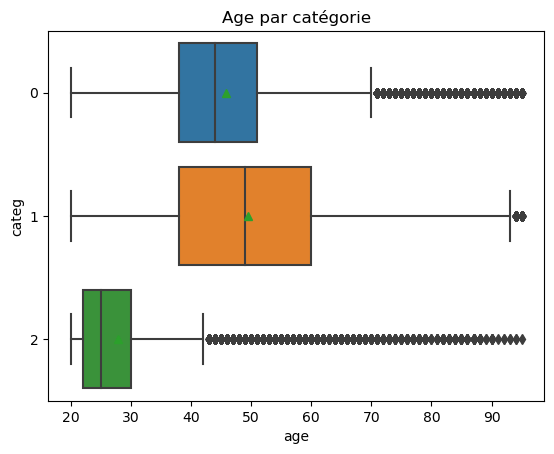

In [111]:
sns.boxplot(data=data, x='age', y='categ', orient='h', showfliers=True, showmeans=True)
plt.title('Age par catégorie')
plt.show()

In [112]:
# L'hypothèse veut que l'age et la catégorie soient fortement correlé, plus jeunes C2, moyen C0 et C1 toutes tranches d'age

# Rejeter l'hypothèse nulle H0 d'égalité des moyennes

# H1 elles diffères

# Test student/t <2 categ

# Il y a 3 catégorie, il faut donc utiliser anova potentiellement

# Il faut comparer la variance entre les groupes

# Analyse de la variance

# Variation totale, inter et intragroupe


In [113]:
#Le test Kolmogorov-Smirnov permet de verifier la distribution normale de chaque catégorie

# H0 : L'echantillon suit loi normal p>0.05
# H1 : pas normal p<0.05

In [114]:
age_categ_U = age_categ[age_categ['categ'] == 1]
age_categ_D = age_categ[age_categ['categ'] == 2]
age_categ_Z = age_categ[age_categ['categ'] == 0]

In [115]:
# L'on constate qu'aucune distribution ne suit de loi normale de part leur pvalue, la répartition de part et d'autres des medians n'est pas égale

In [116]:
test_stat_zero =kstest(age_categ_Z['age'],age_categ_Z['counts'], 'norm')
test_stat_zero

KstestResult(statistic=0.9605263157894737, pvalue=3.1111949565369965e-39, statistic_location=95, statistic_sign=1)

In [117]:
test_stat_un =kstest(age_categ_U['age'],age_categ_U['counts'], 'norm')
test_stat_un

KstestResult(statistic=0.9868421052631579, pvalue=8.241576043806612e-43, statistic_location=95, statistic_sign=1)

In [118]:
test_stat_deux =kstest(age_categ_D['age'],age_categ_D['counts'], 'norm')
test_stat_deux

KstestResult(statistic=0.25, pvalue=0.016983902217881437, statistic_location=95, statistic_sign=1)

In [119]:
# Variance des différentes catégories

In [120]:
[np.var(x, ddof=1) for x in [age_categ_Z['counts'], age_categ_U['counts'], age_categ_D['counts']]]

[49498721.60894736, 4928905.908771929, 1216658.3850877204]

In [121]:
# Le test de levene permet de vérifier l'équivalence de variance entre les différentes catégories  (somme moyenne difference)

In [122]:
st.levene(age_categ_Z['counts'],age_categ_U['counts'],age_categ_D['counts'])

LeveneResult(statistic=24.53778333018194, pvalue=2.2915123848228172e-10)

In [123]:
#La faible pvalue suggere que la variance des differentes catégories n'est pas égale

In [124]:
#Le test de Kruskal est un test non paramétrique qui s'utilise notament quand anova ne remplis pas toutes les conditions avec 2+ categ

# H0: la mediane de chaque groupe est egale p>0.05 // dependant
# H1 :  elle ne l'est pas p<0.05 // independant

In [125]:
st.kruskal(age_categ_Z['counts'],age_categ_U['counts'],age_categ_D['counts'])

KruskalResult(statistic=102.24837814921302, pvalue=6.266813829084025e-23)

In [126]:
# p<0.05 Il n'y pas de corrélation véritable entre l'age et la catégorie des livres acheté, on ne peut pas déterminer en fonction de seulement ça

In [127]:
# L'eta square donne une interprétation supplémentaire au résultat

In [128]:
X = "categ" # qualitative
Y = "age" # quantitative

sous_echantillon = data[data["age"] > 0]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.11602394898416378

In [129]:
# Significatif